In [1]:

import networkx as nx
import random
import operator
import matplotlib.pyplot as plt
import time
import community
# def nei(n):
#     nei_neibor=[]
#     for nei_target in G:
#         try:
#             if length[n][1][nei_target]==1:
#                 nei_neibor.append(nei_target)
#         except:
#             continue

#     return nei_neibor
# 优先转移矩阵 随机游走矩阵


# def rand(rand_i):
#     return 1/G.degree(rand_i)


def pref(pref_i, pref_j, pref_k):  # 这个是 第k个粒子在第i个节点邻居节点j的 优先转移的概率
    num_kong = 0
    for j_t in nei_neibor[pref_i]:  # 邻接节点
        a = N_kong(j_t)
        num_kong += a[0][pref_k]
    return N_kong(pref_j)[0][pref_k]/num_kong


def N_kong(N_kong_i):
    N_kong_0 = []
    total_N = 0
    for N_kong_k in range(K):
        total_N += N_cishu[N_kong_i][N_kong_k]
    for k in range(K):
        N_kong_0.append(N_cishu[N_kong_i][k]/total_N)
    return N_kong_0, total_N  # 返回两个量 第一个是控制矩阵，当前粒子访问节点i的相对频率，第二个是节点i被访问的总次数
# import random#这是一个按照概率选取数字的函数


def rand_pick(seq, probabilities):
    x = random.uniform(0, 1)
    cumprob = 0.0
    for item, item_pro in zip(seq, probabilities):
        cumprob += item_pro
        if x < cumprob:
            break
    return item
#  现在要设置一个能量变量


def E_test(E_test_k, E_test_j, E_test_lizi_t_1):
    test=0
    if lishu[lizi[E_test_k]] == lishu[E_test_lizi_t_1]:
        E[E_test_k][E_test_j]+=sanjiao
    else:
        E[E_test_k][E_test_j]-=sanjiao
    if E[E_test_k][E_test_j]>1:
        E[E_test_k][E_test_j]=1
    elif E[E_test_k][E_test_j]<0:
        E[E_test_k][E_test_j]=1
        test=1
        print(E_test_k,E_test_j)
    return test        
def E_best(E_best_k):
    return E[k].index(max(E[E_best_k]))


def tong_zitu (node_a, node_b):
    for tong_zitu_i in range(len(zitu)):
        if(node_a in zitu[tong_zitu_i]) and (node_b in zitu[tong_zitu_i]):
            return 1
    return 0
def jishi():
    import time
    return time.time()

In [5]:
#初始化

starttime=jishi()
G=nx.Graph()
G_test=nx.DiGraph()
N_cishu = []
K=0
chushi = 1
time=0
name_node_str=[]
name_node_int=[]
name_node_num=0
lishu = [-1]*name_node_num
time_max=0




ave_com=[0]*100
num_edge=0
num_node=0

com_list=[]
for T in range(1,100):
    NUM_N=10*T
    NUM_E=0.1*pow(T,2.3)
    edge_list=list(G.edges())
    for i in range(num_node,NUM_N):
        G.add_node(i)
    while num_edge<NUM_E:
        source=random.randint(0,NUM_N)
        target=random.randint(0,NUM_N)
        if ([source,target] not in edge_list) and ([target,source] not in edge_list) :
            G.add_edge(source,target)
        num_edge=G.number_of_edges()

    num_node=G.number_of_nodes()

#     print('节点个数：',G.number_of_nodes())







    num_node = len(G.nodes())
    num_edge=len(G.edges())

    num_edge=G.number_of_edges()



    zitu=list(nx.connected_components(G))
    xinzitu=[]
    if chushi==0 :
        for i in range(len(zitu)):
            if operator.eq(list(set(list(node_list))-set(list(zitu[i]))),node_list) :
                xinzitu.append(i)
                K+=1
    else:
        K=len(zitu)#粒子数量

    node_list=list(G.nodes())


    if chushi==0 :
        lizi_yuan_num=len(lizi)
        for i in xinzitu:
            lizi.append(random.sample(list(zitu[i]),1)[0])

    else:
        lizi=[]
        for i in range(K):
            lizi.append(random.sample(list(zitu[i]),1)[0])


    N_cishu_zancun=N_cishu
    N_cishu=[]
    for i in G:
        N_cishu.append([1]*K)
    for i in range(len(N_cishu_zancun)):
        for j in range(len(N_cishu_zancun[i])):
            N_cishu[i][j]=N_cishu_zancun[i][j]




    E=[]
    for i in range(K):
        E.append([0.5])
        for j in G:
            E[i].append(0.5)
    sanjiao=0.3
    t_c=[0]*K

    t=0
    for i in range(K):
        N_cishu[lizi[i]][t]+=1

        t+=1

    if chushi==1:
        chushi=0
    length=list(nx.shortest_path_length(G))
    nei_neibor=[]
    for nei_source in G:
        nei_neibor.append([])
        for nei_target in G:
            try:
                if length[nei_source][1][nei_target]==1:
                    nei_neibor[nei_source].append(nei_target)
            except:
                continue
    rand=[]
    for rand_i in G:
        if G.degree(rand_i)!=0 :
            rand.append(1/G.degree(rand_i))
        else:
            rand.append(1)

    time_max=time+20
    num_node=G.number_of_nodes()

    lishu_num=len(lishu)
    if lishu:
        for i in range(num_node-lishu_num):
            lishu.append(-1)
    else:
        lishu=[-1]*num_node
    bianliquan=1
    while (time < time_max) and (bianliquan == 1):#小的用这个

        bianliquan=0#bianliquan=1的时候说明还有没有遍历到的点，会导致隶属判断出错
        time+=1
        lizi_t_1=[-1]*K
        for i in range(num_node):#这里判断各个点的隶属情况
            lishu[i]=N_cishu[i].index(max(N_cishu[i]))

        for k in range(len(lizi)):#当前算第k个粒子
            rand_pref=[]
            for j in nei_neibor[lizi[k]]:#j是粒子邻居
                rand_pref.append(0.5*rand[lizi[k]]+0.5*pref(lizi[k],j,k))
            lizi_t_1[k]=lizi[k]

            if len(nei_neibor[lizi[k]])>0 :
                lizi[k]=rand_pick(nei_neibor[lizi[k]],rand_pref)


            if   lishu[lizi[k]]==lishu[lizi_t_1[k]]  :
                E[k][lizi[k]]=E[k][lizi[k]]+sanjiao
    #             print(k,lizi[k],E[k][lizi[k]],'+++')
            else:
                E[k][lizi[k]]-=sanjiao

            if E[k][lizi[k]]>1 :
                E[k][lizi[k]]=1
            elif E[k][lizi[k]]<0 :
    #             print(lizi[k],E_best(k))#这个是显示粒子回家的
                E[k][lizi[k]]=0
                lizi[k]=E_best(k)
            N_cishu[lizi[k]][k]+=1
        for i in range(len(N_cishu)):#现在是全部节点被遍历一遍可以结束 应该改成前后两个状态相似（收敛）
            if len(set(N_cishu[i]))==1 :
                bianliquan=1


        if time>2*time_max :
            print('Not enough')
            break


    bijiao=[]*K#列表呈现 4*4 行代表社区 列代表社区内节点在对应社区的得分
    for i in range(K):
        bijiao.append([])
        bijiao[i]=[0]*K
    for node in node_list:
        for lie in range(K):
            bijiao[lishu[node]][lie]+=N_cishu[node][lie]

    hb_list=[]
    for b_i in range(len(bijiao)):
        for b_j in range(len(bijiao[b_i])):
            if (bijiao[b_i][b_j] != max(bijiao[b_i])) and ((bijiao[b_i][b_j])  > (max(bijiao[b_i])/8)) and tong_zitu(lizi[b_i],lizi[b_j]):
                hb_list.append([b_i,b_j])

    for i in range(len(hb_list)):##这个是整理待合并粒子
        hb_list[i]=sorted(hb_list[i])
    
    count_hb=0
    for hb_ci in hb_list:
        if sorted(hb_ci,reverse=True)in hb_list :
            del hb_list[count_hb]
        else:
            count_hb+=1
    
    hb_i=0
    while 1:
        hb_j=hb_i+1
        while 1:
            if hb_j+1>len(hb_list):
                break
            if hb_list[hb_i]==hb_list[hb_j] :
                del hb_list[hb_j]
            else:
                hb_j+=1

        hb_i+=1
        if hb_i>=len(hb_list) :
            break  #    

#     list_shan=[]
#     list_liu=[]
#     shan_temp=0
#     len_hb=len(hb_list)
#     shan=[-1,-1]
#     for hb_num in sorted(range(len_hb),reverse=True):
#         shan[0]=hb_list[hb_num][0]
#         shan[1]=hb_list[hb_num][1]
#         for i in range(len(list_shan)):#如果要删除的这个例子比以前删除过的粒子值大，那么就减一
#             if list_shan[i]<shan[1] :
# #                 print(list_shan,shan[1],hb_num)###########################################标记
#                 shan[1]=shan[1]-1
#             elif list_shan[i]==shan[1]:
#                 shan[1]=list_liu[i]
#             if list_shan[i]<shan[0] :#如果现在这个粒子以前有节点比他小 却被删除了 那么该粒子减一
# #                 print(list_shan,shan[0])############################################标记
#                 shan[0]=shan[0]-1
#         for i in range(len(N_cishu)):#N_cishu处理。#将所有节点对应位置隶属程度减一
#             N_cishu[i][shan[0]]+=N_cishu[i][shan[1]]-1#这个减一是除掉初始值影响
#             del N_cishu[i][shan[1]]

        
#         #lizi处理
# #         print('del :lizi',shan[1])#####################标记
#         list_liu.append(shan[0])
#         list_shan.append(shan[1])
#         del lizi[shan[1]]
    partG=nx.Graph()
    for hb_num in range(len(hb_list)):
        partG.add_edge(hb_list[hb_num][0],hb_list[hb_num][1])
    part=list(nx.connected_components(partG))
    
    list_shan=[]

    for pp in part:
        shanchu=[]
        baoliu=list(sorted(list(pp),reverse=False))[0]
        shanchu=list(sorted(list(pp),reverse=False))[1:]
        for shanchu_j in sorted(list(shanchu),reverse=True):
            list_shan.append(shanchu_j)
            for shanchu_i in range(len(N_cishu)):#N_cishu处理。#将所有节点对应位置隶属程度减一
                N_cishu[shanchu_i][baoliu]+=N_cishu[shanchu_i][shanchu.index(shanchu_j)]-1#这个减一是除掉初始值影响
                del N_cishu[shanchu_i][shanchu.index(shanchu_j)]

    for del_lizi in sorted(list_shan,reverse=True):
        del lizi[del_lizi]
        for i in range(num_node):#这里判断各个点的隶属情况
            lishu[i]=N_cishu[i].index(max(N_cishu[i]))
        K=K-1


    values =K
    try:
        num_com=values
#         print('社区数量：',num_com)
        com_list.append(num_com)
        ave_com[T]+=num_com
    except:
        print("初始")

        
endtime = jishi()        
dtime = endtime - starttime
# print(dtime)

In [26]:
# sorted(list(pp),reverse=False)

0.01300358772277832


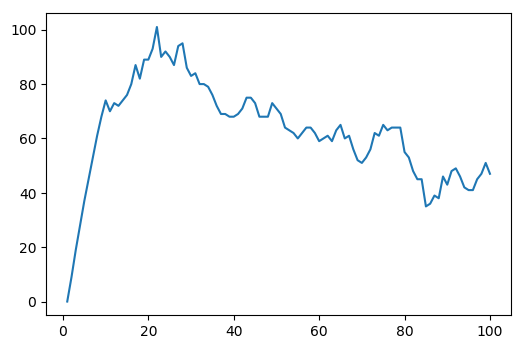

In [3]:
# coding=utf-8 #
import time

starttime = time.time()


for i in range(len(ave_com)):
    ave_com[i]=ave_com[i]/1
plt.plot(list(range(1,101)),ave_com)

endtime = time.time()
dtime = endtime - starttime
print(dtime)
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 
plt.savefig('test7.png')
plt.show()

In [32]:
N_cishu[0]

[2,
 2,
 1,
 2,
 3,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]